In [1]:
import numpy as np 
import pandas as pd
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt

In [2]:
Data=pd.read_csv('cities.csv')
Data

,CITY,WORK,PRICE,SALARY
0,Amsterdam,1714,65.6,49.0
1,Athens,1792,53.8,30.4
2,Bogota,2152,37.9,11.5
3,Bombay,2052,30.3,5.3
4,Brussels,1708,73.8,50.5
5,Buenos Aires,1971,56.1,12.5
6,Caracas,2041,61.0,10.9
7,Chicago,1924,73.9,61.9
8,Copenhagen,1717,91.3,62.9
9,Dublin,1759,76.0,41.4


In [3]:
Data=Data.iloc[:,2:]
Data

,PRICE,SALARY
0,65.6,49.0
1,53.8,30.4
2,37.9,11.5
3,30.3,5.3
4,73.8,50.5
5,56.1,12.5
6,61.0,10.9
7,73.9,61.9
8,91.3,62.9
9,76.0,41.4


In [4]:
KM_cluster=KMedoids(n_clusters=2,metric='euclidean')
KM_cluster.fit_predict(Data)


array([0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0], dtype=int64)

In [5]:
print(KM_cluster.medoid_indices_)
KM_cluster.cluster_centers_

[26 32]


array([[82. , 53.3],
       [49.2, 13.8]])

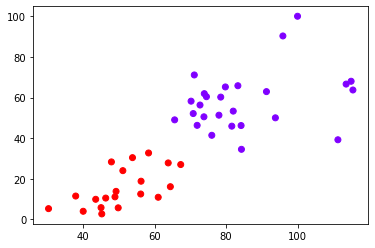

In [6]:
plt.scatter(Data.iloc[:,0],Data.iloc[:,1],c=KM_cluster.labels_,cmap='rainbow')

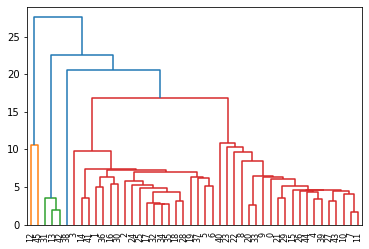

In [7]:
import scipy.cluster.hierarchy as sch
ddg=sch.dendrogram(sch.linkage(Data,'single'))

In [8]:
from sklearn.cluster import AgglomerativeClustering as AC
cluster =AC(n_clusters=5,affinity='euclidean',linkage='single')
cluster.fit_predict(Data)

array([0, 4, 4, 4, 0, 4, 4, 0, 0, 0, 0, 0, 1, 2, 4, 0, 4, 4, 4, 4, 0, 0,
       0, 0, 4, 4, 0, 0, 4, 0, 4, 2, 4, 0, 4, 4, 4, 4, 3, 0, 0, 4, 2, 0,
       0, 1], dtype=int64)

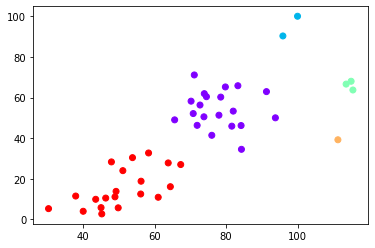

In [9]:
import matplotlib.pyplot as plt
plt.scatter(Data.iloc[:,0],Data.iloc[:,1],c=cluster.labels_,cmap='rainbow')
